

```
# This is formatted as code
```

Bikes Sharing
=========================================
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
  

In [4]:
import pandas as pd

dy_df = pd.read_csv('day.csv')
dy_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hr_df = pd.read_csv('hour.csv')
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
dy_df.shape ,dy_df.shape

((731, 16), (731, 16))

In [7]:
# Check duplicates
print("No. of duplicates in day.csv: ",dy_df.duplicated().sum())
print("No. of duplicates in hour.csv: ",hr_df.duplicated().sum())

# chech missing values
print("No. of missing values in day.csv: ",dy_df.isnull().sum().sum())
print("No. of missing values in hour.csv: ",hr_df.isnull().sum().sum())

No. of duplicates in day.csv:  0
No. of duplicates in hour.csv:  0
No. of missing values in day.csv:  0
No. of missing values in hour.csv:  0


In [8]:
dy_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Convert to datetime
dy_df['dteday'] = pd.to_datetime(dy_df['dteday'])
hr_df['dteday'] = pd.to_datetime(hr_df['dteday'])

In [10]:
# Drop unnecessary columns
dy_df.drop(["instant"], axis=1, inplace=True)
hr_df.drop(["instant", 'dteday'], axis=1, inplace=True)

In [11]:
# Check Count vs. datetime
import plotly.express as px

fig = px.line(dy_df, x='dteday', y='cnt', title='Count vs. datetime')
fig.show()

In [12]:
# Registred and Casual vs. datetime(day.csv)
fig = px.line(dy_df, x='dteday', y=['registered','casual'], title='Registered and Casual vs. datetime (day.csv)')
fig.show()

In [13]:
# Count vs. Hours (hours.csv)
hours = hr_df.groupby('hr').sum().reset_index()
fig = px.line(hours, x='hr', y='cnt', title='Count vs. Hours (hours.csv)')
fig.show()

In [14]:
# Registerd and Casual vs. Hours (hour.csv)
fig = px.line(hours,x='hr',y=['registered','casual'], title='Registered and Casual vs. datetime (hour.csv)')
fig.show()

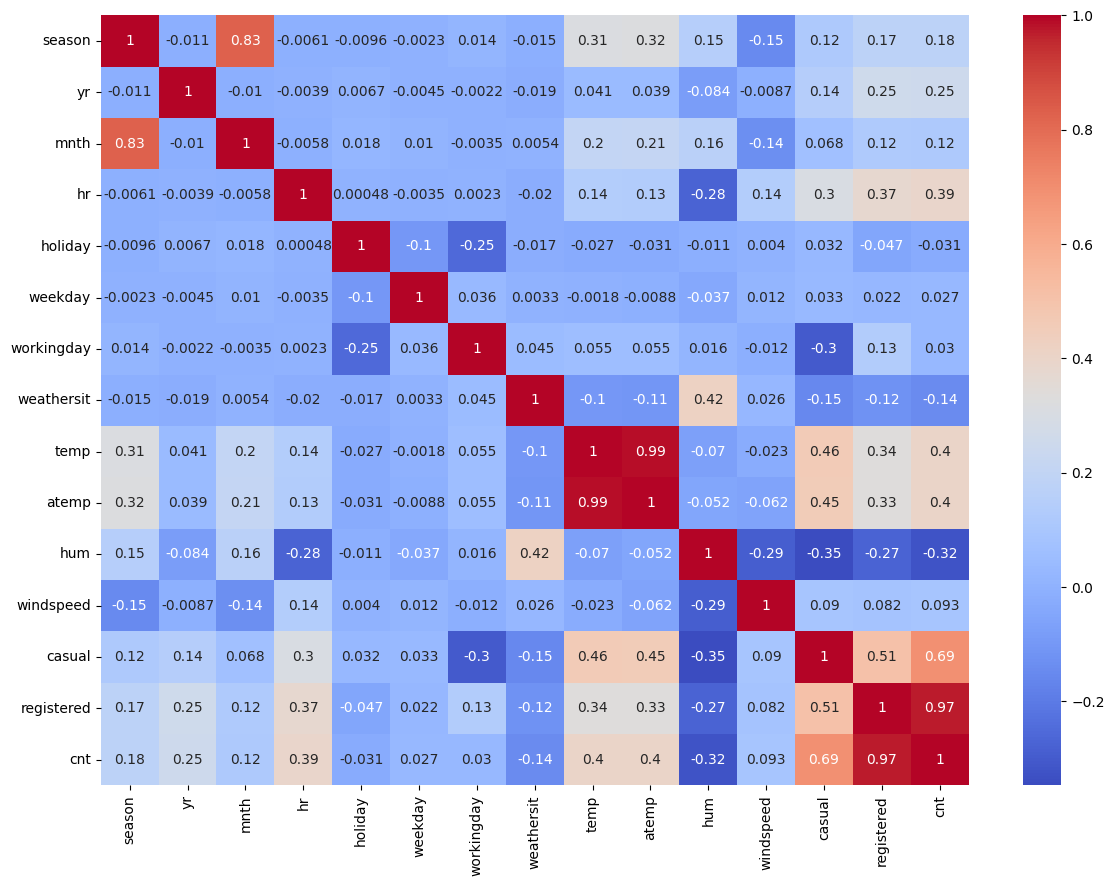

In [15]:
# Correlation
import seaborn as sns
import matplotlib.pyplot as plt

corr = hr_df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

<Axes: >

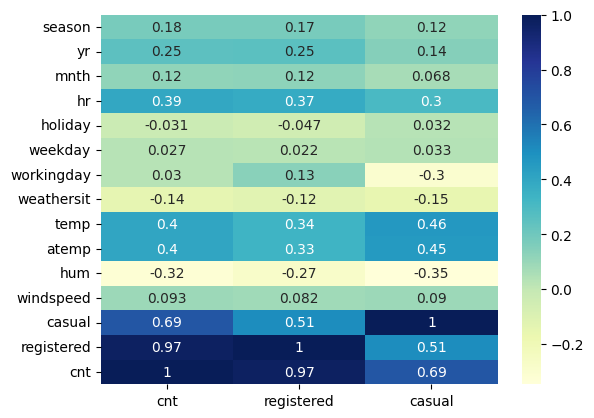

In [16]:
c = hr_df.corr()[['cnt','registered','casual']]
sns.heatmap(c, annot=True, cmap='YlGnBu')

# Data Preprocessing

In [17]:
# Take copy
df = hr_df.copy()

# Drop 'cnt','atemp'
df.drop(columns=['cnt',  'atemp'] , axis=1, inplace=True)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,27
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3,10
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1


In [18]:
# Numerical colums
num_cols= ['temp','hum','windspeed'] # all are normalized

# Categorical
cat_cols = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit'] # To be one-hot encoded

In [19]:
# splite into train and test
from sklearn.model_selection import train_test_split

X = df.drop(['casual' , 'registered'], axis=1 )
y = df[['casual', 'registered']]

X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.2, random_state=42, shuffle=False) #Shuffle=False to keep the order of datetime

In [20]:
X.sample()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
14257,3,1,8,6,0,3,1,1,0.62,0.73,0.0


In [21]:
y.sample()

,casual,registered
4929,26,228


In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder()
transformer = ColumnTransformer([('one_hot_encoder', ohe ,cat_cols)], remainder = 'passthrough')

x_train = transformer.fit_transform(X_train)
x_test = transformer.transform(X_test)

# Apply quick classic ml models


In [23]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

print("Train score: ", lr.score(x_train, y_train))
print("Test score: ", lr.score(x_test, y_test))

Train score:  0.6359018898881216
Test score:  0.601486071781331


In [24]:
# Apply Descision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15, None],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4, 6],  # Minimum samples at each leaf
    'max_leaf_nodes': [None, 10, 50, 100],  # Max number of leaf nodes
}

grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid.fit(x_train, y_train)

print('Train score: ', grid.score(x_train, y_train))
print('Test score: ', grid.score(x_test, y_test))

Train score:  0.9137297815249532
Test score:  0.762970695907096


In [25]:
!pip install tensorflow


In [46]:
import tensorflow
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam , RMSprop, AdamW , Adadelta , Adagrad, Adamax , Adafactor, Nadam, Ftrl
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping

# Convert to array
X_train_array = x_train.toarray()
X_test_arr = x_test.toarray()

model = Sequential()
model.add(Input(shape=(X_train_array.shape[1],)))
model.add(Dense(128, activation='relu',kernel_regularizer= l1_l2(0.01 , 0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu',kernel_regularizer= l1_l2(0.002 , 0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu',kernel_regularizer= l1_l2(0.002 , 0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2, activation='linear'))

# compile the keras model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mse'])



# 3. Set up callbacks
early_stop = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
model_ckpt = ModelCheckpoint('best_model.h5', monitor='val_loss',save_best_only=True)

# fit the keras model on the dataset
history = model.fit(X_train_array, y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=32,
                    verbose=1,
                    callbacks=[early_stop, model_ckpt])

Epoch 1/10
332/348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14984.3955 - mse: 14974.8438

348/348 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 14948.4863 - mse: 14938.9375 - val_loss: 32402.4102 - val_mse: 32392.9434
Epoch 2/10
333/348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11044.9258 - mse: 11035.4072

348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 10986.1465 - mse: 10976.6260 - val_loss: 15839.6689 - val_mse: 15829.9922
Epoch 3/10
333/348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6357.9849 - mse: 6348.2593

348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6324.5532 - mse: 6314.8247 - val_loss: 5510.1562 - val_mse: 5500.2202
Epoch 4/10
342/348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3505.8608 - mse: 3495.8818

348/348 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3496.3757 - mse: 3486.3955 - val_loss: 3087.8469 - val_mse: 3077.7124
Epoch 5/10
342/348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2061.3159 - mse: 2051.1394

348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2057.8252 - mse: 2047.6477 - val_loss: 2398.8821 - val_mse: 2388.5544
Epoch 6/10
339/348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1508.5463 - mse: 1498.1509

348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1508.0786 - mse: 1497.6816 - val_loss: 2128.0884 - val_mse: 2117.5259
Epoch 7/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1339.2292 - mse: 1328.6154 - val_loss: 2290.5317 - val_mse: 2279.7859
Epoch 8/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1305.2999 - mse: 1294.5193 - val_loss: 2226.4368 - val_mse: 2215.5366
Epoch 9/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1275.5834 - mse: 1264.6426 - val_loss: 2258.4084 - val_mse: 2247.3428
Epoch 10/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1217.2264 - mse: 1206.1226 - val_loss: 2462.6147 - val_mse: 2451.4238


In [47]:
# evaluate the keras model
model.evaluate(X_test_arr, y_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2351.9312 - mse: 2341.3682


[2524.106201171875, 2513.54345703125]

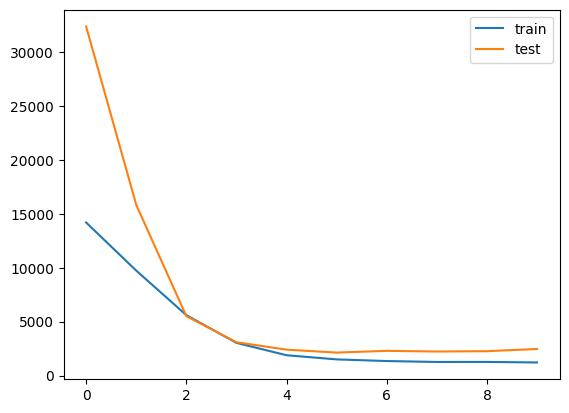

In [48]:
# plot histoy
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [49]:
# R2 score
from sklearn.metrics import r2_score

y_pred = model.predict(X_test_arr)
r2_score(y_test, y_pred)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.8277307748794556

In [30]:
#pip install keras-tuner

In [31]:
import keras_tuner as kt
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop, Adadelta, Adagrad, Adamax, Nadam

# 1. Build Model Function
def build_model(hp):
    model = Sequential()

    # Hyperparameters
    activation = hp.Choice('activation', ['relu', 'sigmoid'])
    initializer = hp.Choice('initializer', ['glorot_uniform', 'he_uniform'])
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'adadelta', 'adagrad', 'adamax', 'nadam'])
    dropout = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
    l1_val = hp.Float('l1', 1e-4, 1e-2, sampling='LOG')
    l2_val = hp.Float('l2', 1e-4, 1e-2, sampling='LOG')

    model.add(Input(shape=(X_train_array.shape[1],)))

    model.add(Dense(128, activation=activation, kernel_initializer=initializer,
                    kernel_regularizer=l1_l2(l1_val, l2_val)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))

    model.add(Dense(64, activation=activation, kernel_initializer=initializer,
                    kernel_regularizer=l1_l2(l1_val, l2_val)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))

    model.add(Dense(32, activation=activation, kernel_initializer=initializer,
                    kernel_regularizer=l1_l2(l1_val, l2_val)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))

    model.add(Dense(2, activation='linear'))

    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    return model



In [35]:
# 2. Create Hyperband Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_mse',  # use 'val_mse' not 'mse'
    max_epochs=10,
    factor=3,
    directory='my_diractory',
    project_name='x'
)

# 3. Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_ckpt = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# 4. Search
tuner.search(X_train_array, y_train,
             epochs=30,
             validation_split=0.2,
             callbacks=[early_stop, model_ckpt],
             verbose=1)



Trial 24 Complete [00h 00m 31s]
val_mse: 41996.8984375

Best val_mse So Far: 2298.3134765625
Total elapsed time: 00h 05m 52s


In [36]:
 # === Step 3: Get the Best Model ===
best_hps = tuner.get_best_hyperparameters(1)[0]
print('Best hyperparameters:')
for i in best_hps.values.keys():
  print(f"{i}:{best_hps.get(i)}")

best_model = tuner.hypermodel.build(best_hps)
history= best_model.fit(X_train_array, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    verbose=1,
                    callbacks=[early_stop, model_ckpt])

Best hyperparameters:
activation:relu
initializer:he_uniform
optimizer:nadam
dropout:0.2
l1:0.00012836909316830573
l2:0.00045082686534562007
tuner/epochs:10
tuner/initial_epoch:4
tuner/bracket:1
tuner/round:1
tuner/trial_id:0018
Epoch 1/50
335/348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14888.6299 - mse: 14888.1221

348/348 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 14867.0186 - mse: 14866.5107 - val_loss: 31036.8047 - val_mse: 31036.3008
Epoch 2/50
344/348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11260.1533 - mse: 11259.6455

348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 11238.8652 - mse: 11238.3584 - val_loss: 16578.1152 - val_mse: 16577.5996
Epoch 3/50
337/348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6305.5513 - mse: 6305.0391

348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6284.5967 - mse: 6284.0845 - val_loss: 7872.0352 - val_mse: 7871.5176
Epoch 4/50
333/348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3760.0325 - mse: 3759.5129

348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3733.3770 - mse: 3732.8574 - val_loss: 3636.6479 - val_mse: 3636.1226
Epoch 5/50
347/348 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2122.5408 - mse: 2122.0146

348/348 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2121.6382 - mse: 2121.1118 - val_loss: 2651.6858 - val_mse: 2651.1536
Epoch 6/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1553.8868 - mse: 1553.3535 - val_loss: 2713.7478 - val_mse: 2713.2092
Epoch 7/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1425.2515 - mse: 1424.7118 - val_loss: 2660.1470 - val_mse: 2659.6025
Epoch 8/50
338/348 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1329.2921 - mse: 1328.7462

348/348 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1330.1415 - mse: 1329.5955 - val_loss: 2346.4333 - val_mse: 2345.8833
Epoch 9/50
335/348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1297.5068 - mse: 1296.9563

348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1298.4818 - mse: 1297.9312 - val_loss: 2342.0774 - val_mse: 2341.5232
Epoch 10/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1280.4364 - mse: 1279.8804

348/348 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1280.4600 - mse: 1279.9041 - val_loss: 2267.1882 - val_mse: 2266.6282
Epoch 11/50
344/348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1274.7113 - mse: 1274.1501

348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1274.6334 - mse: 1274.0721 - val_loss: 2197.1370 - val_mse: 2196.5713
Epoch 12/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1392.9089 - mse: 1392.3423 - val_loss: 2488.7629 - val_mse: 2488.1926
Epoch 13/50
341/348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1265.1377 - mse: 1264.5667

348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1264.7625 - mse: 1264.1913 - val_loss: 2134.9861 - val_mse: 2134.4109
Epoch 14/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1322.0129 - mse: 1321.4368 - val_loss: 2265.4641 - val_mse: 2264.8843
Epoch 15/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1229.3987 - mse: 1228.8170 - val_loss: 2234.7808 - val_mse: 2234.1953
Epoch 16/50
339/348 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1220.3494 - mse: 1219.7626

348/348 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1220.0332 - mse: 1219.4463 - val_loss: 2104.3247 - val_mse: 2103.7344
Epoch 17/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1152.9071 - mse: 1152.3157

348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1153.0897 - mse: 1152.4983 - val_loss: 2089.6274 - val_mse: 2089.0325
Epoch 18/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1139.2822 - mse: 1138.6854 - val_loss: 2188.8882 - val_mse: 2188.2871
Epoch 19/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1137.1796 - mse: 1136.5779 - val_loss: 2195.9211 - val_mse: 2195.3154
Epoch 20/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1162.3628 - mse: 1161.7565 - val_loss: 2138.0461 - val_mse: 2137.4355
Epoch 21/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1090.9093 - mse: 1090.2975 - val_loss: 2159.0188 - val_mse: 2158.4031
Epoch 22/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1122.5963 - mse: 1121.9799 - val_loss: 2137.3838 - val_mse: 2136.7637
Epoch 23/50
343/348 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1118.3960 - mse: 1117.7748

348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1118.3638 - mse: 1117.7426 - val_loss: 2056.0530 - val_mse: 2055.4277
Epoch 24/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1115.5031 - mse: 1114.8765 - val_loss: 2132.7717 - val_mse: 2132.1414
Epoch 25/50
344/348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1105.0448 - mse: 1104.4130

348/348 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1105.2644 - mse: 1104.6324 - val_loss: 2053.3186 - val_mse: 2052.6831
Epoch 26/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1173.1188 - mse: 1172.4821 - val_loss: 2183.7371 - val_mse: 2183.0967
Epoch 27/50
343/348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1128.0663 - mse: 1127.4250

348/348 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1128.2302 - mse: 1127.5890 - val_loss: 2022.8517 - val_mse: 2022.2069
Epoch 28/50
345/348 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1093.6512 - mse: 1093.0048

348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1093.4044 - mse: 1092.7579 - val_loss: 1962.8839 - val_mse: 1962.2339
Epoch 29/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1079.2180 - mse: 1078.5660 - val_loss: 2144.0742 - val_mse: 2143.4185
Epoch 30/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1074.2756 - mse: 1073.6185 - val_loss: 2307.3633 - val_mse: 2306.7024
Epoch 31/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1074.4344 - mse: 1073.7725 - val_loss: 2016.3986 - val_mse: 2015.7328
Epoch 32/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1049.3669 - mse: 1048.6997 - val_loss: 2015.8346 - val_mse: 2015.1632
Epoch 33/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1047.1169 - mse: 1046.4442 - val_loss: 2019.2498 - val_mse: 2018.5734
Epoch 34/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1057.7539 - mse: 1057.0768 - val_loss: 1993.9536 - val_mse: 1993.2729
Epoch 35/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1182.8295 - mse: 1182.1470 - val_l

348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1022.3477 - mse: 1021.6603 - val_loss: 1922.5320 - val_mse: 1921.8414
Epoch 37/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1070.3195 - mse: 1069.6271 - val_loss: 2149.8982 - val_mse: 2149.2029
Epoch 38/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 979.9385 - mse: 979.2416 - val_loss: 2328.9036 - val_mse: 2328.2034
Epoch 39/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1027.9392 - mse: 1027.2375 - val_loss: 2218.5723 - val_mse: 2217.8669
Epoch 40/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1025.5901 - mse: 1024.8833 - val_loss: 1951.2385 - val_mse: 1950.5284
Epoch 41/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1032.0911 - mse: 1031.3789 - val_loss: 1961.3712 - val_mse: 1960.6559
Epoch 42/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1051.2699 - mse: 1050.5536 - val_loss: 1961.0554 - val_mse: 1960.3357
Epoch 43/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1029.6895 - mse: 1028.9681 - val_los

348/348 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1028.1782 - mse: 1027.4460 - val_loss: 1866.8777 - val_mse: 1866.1407
Epoch 46/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1091.0139 - mse: 1090.2769 - val_loss: 1883.0305 - val_mse: 1882.2887
Epoch 47/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1034.7339 - mse: 1033.9912 - val_loss: 2041.2905 - val_mse: 2040.5442
Epoch 48/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1122.4775 - mse: 1121.7302 - val_loss: 2004.0319 - val_mse: 2003.2812
Epoch 49/50
347/348 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1038.3492 - mse: 1037.5967

348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1038.2430 - mse: 1037.4905 - val_loss: 1842.0847 - val_mse: 1841.3292
Epoch 50/50
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1002.3542 - mse: 1001.5972 - val_loss: 2098.6211 - val_mse: 2097.8591


In [41]:
# ✅ Evaluate
loss, mse = best_model.evaluate(X_test_arr, y_test)
print("Test MSE:", mse)

# ✅ Get predictions
from sklearn.metrics import r2_score
y_pred = best_model.predict(X_test_arr)

# ✅ Calculate R² Score
print("R² Score:", r2_score(y_test, y_pred))

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1886.4967 - mse: 1885.7405
Test MSE: 2033.4935302734375
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
R² Score: 0.862356424331665
